In [1]:
#Minerando texto de websites
#autor: Fernando Schmitt

In [2]:
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import string
import urllib.request, urllib.error, urllib.parse
import ssl
import re

In [3]:
#Caso haja erro ao tentar fazer o download nltk
try:
     _create_unverified_https_context = ssl._create_unverified_context

except AttributeError:
    pass

else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fernando/snap/jupyter/6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#Preparando o endereço alvo
url= 'https://pt.wikipedia.org/wiki/Minera%C3%A7%C3%A3o_de_texto'
response= urllib.request.urlopen(url)
content= response.read().decode('UTF-8')
print(content)


<!DOCTYPE html>
<html class="client-nojs" lang="pt" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Mineração de texto – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"2a66fafd-aee2-42a7-95bd-c59b0583bc71","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Mineração_de_texto","wgTitle":"Mineração de texto","wgCurRevisionId":62314074,"wgRevisionId":62314074,"wgArticleId":176531,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Artigos que carecem de notas de rodapé desde agosto de 2015","!Artigos que carecem de notas de rodapé sem ind

In [14]:
#limpando excesso de tags e simbolos html
text= content
nw= ['skin','parser','cologne','blue','output','ambox','table','background','timeless','vector']

In [15]:
for i in nw:
    text_t= re.sub('<[^>]+?>'+i,'',text) 

In [16]:
#salvando a página para manipulação
file= open('results_web.txt', 'w')
file.write(text_t)
file.close

<function TextIOWrapper.close()>

In [17]:
#criando o corpus pra ler a página salva localmente
corpus= PlaintextCorpusReader('results_web.txt', '.*', encoding= 'ISO-8859-1')
local= '/home/fernando/Documentos/python/results_web.txt'

In [24]:
#acessando todo texto do arquivo
all_text= corpus.raw(local)
#obtendo todas as palavras
aw= corpus.words(local) 

In [19]:
#quantidade de palavras no arquivo
qwords= corpus.words(local)
len(qwords)

29531

In [20]:
#stopwords 
stop= stopwords.words('portuguese')
stop

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [21]:
#definindo as cores que serão utilizadas na nuvem de palavras
colors= ListedColormap(['green','red','yellow','blue','black'])

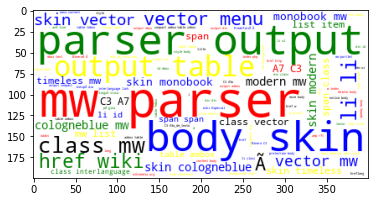

In [22]:
#criando a nuvem de palavras 
cloud= WordCloud(background_color='white', colormap= colors ,stopwords= stop, max_words= 100)
cloud.generate(all_text)
plt.imshow(cloud)

In [26]:
#removendo stopwords
wts= [p for p in aw if p not in stop]
len(wts)

28106

In [27]:
# Remoção da pontuação, gerando uma lista sem stop words e sem pontuação
wwp= [p for p in wts if p not in string.punctuation]
len(wwp)

18806

In [28]:
#frequência de palavras
fw = nltk.FreqDist(wwp)
fw

FreqDist({'="': 945, 'mw': 649, 'parser': 401, 'skin': 399, 'body': 399, 'output': 399, 'class': 350, 'span': 347, '</': 318, '></': 286, ...})

In [30]:
#mais comuns
mc = fw.most_common(300)
mc

[('="', 945),
 ('mw', 649),
 ('parser', 401),
 ('skin', 399),
 ('body', 399),
 ('output', 399),
 ('class', 350),
 ('span', 347),
 ('</', 318),
 ('></', 286),
 ('table', 286),
 ('li', 274),
 ('§', 254),
 ('"><', 224),
 ('C3', 220),
 ('£', 219),
 ('">', 208),
 ('Ã', 199),
 ('vector', 198),
 ('href', 197),
 ('title', 175),
 ('><', 171),
 ('div', 163),
 ('wiki', 135),
 ('="/', 134),
 ('id', 134),
 ('mbox', 119),
 ('ambox', 118),
 ('amp', 113),
 ('","', 109),
 ('¡', 107),
 ('menu', 94),
 ('p', 81),
 ('org', 80),
 ('list', 80),
 ('cologneblue', 78),
 ('modern', 78),
 ('monobook', 78),
 ('timeless', 78),
 ('content', 71),
 ('A7', 71),
 ('©', 70),
 ('\xad', 70),
 ('link', 70),
 ('item', 70),
 ('border', 70),
 ('0', 66),
 ('imbox', 65),
 ('1', 64),
 ('style', 63),
 ('wikipedia', 62),
 ('label', 58),
 ('":"', 57),
 ('interlanguage', 56),
 ('D0', 56),
 ('text', 56),
 ('tmbox', 55),
 ('https', 52),
 ('://', 50),
 ('ul', 50),
 ('":', 49),
 ('aria', 49),
 ('compact', 48),
 ('solid', 47),
 ('lang', 4

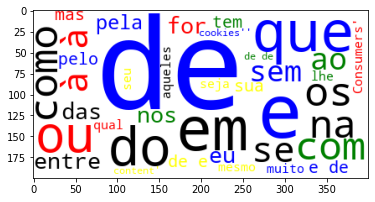

In [31]:
#criando nova nuvem de palavras 
cloud= WordCloud(background_color='white', colormap= colors ,stopwords= wts, max_words= 100)
cloud.generate(all_text)
plt.imshow(cloud)